In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train = './imagenette2-320/train'
val = './imagenette2-320/val'

In [4]:
class ToyCNN(nn.Module):
    def __init__(self, num_classes):
        super(ToyCNN, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(), nn.Linear(128 * 28 * 28, 512), nn.ReLU(), nn.Dropout(0.5),  nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        
        return x

In [5]:
data_transforms = {
    'train': transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),]),
    'val': transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),]),
}

In [6]:
train_dataset = datasets.ImageFolder(root=train, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=val, transform=data_transforms['val'])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

classes = train_dataset.classes
classes

['n01440764',
 'n02102040',
 'n02979186',
 'n03000684',
 'n03028079',
 'n03394916',
 'n03417042',
 'n03425413',
 'n03445777',
 'n03888257']

# Geometrijske transformacije

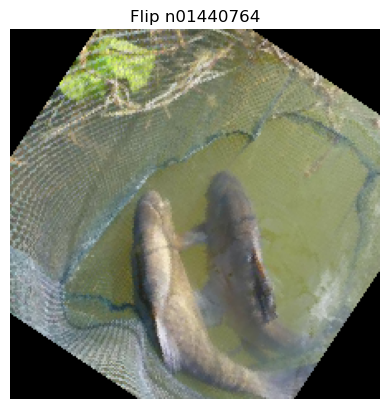

In [7]:
transformation = transforms.Compose([transforms.RandomRotation(degrees=47)])
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Flip {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

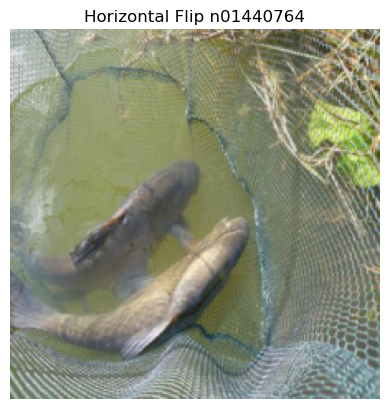

In [8]:
transformation = transforms.Compose([transforms.RandomHorizontalFlip(1)])
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Horizontal Flip {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

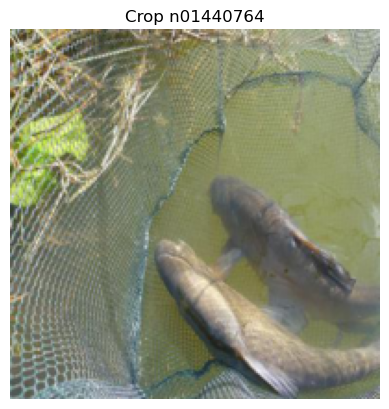

In [9]:
transformation = transforms.Compose([transforms.RandomCrop(size=200)])
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Crop {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

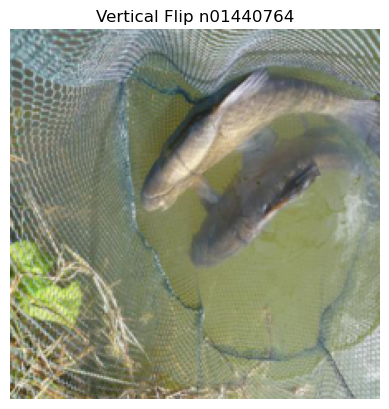

In [10]:
transformation = transforms.Compose([transforms.RandomVerticalFlip(1)])
# DRY = Do Repeat Yourself
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Vertical Flip {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

# Fotometrijske transformacije

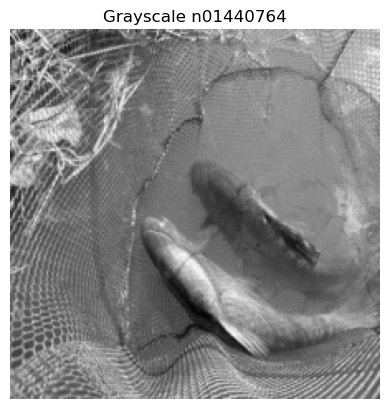

In [11]:
transformation = transforms.Compose([transforms.Grayscale()])
# DRY = Do Repeat Yourself
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Grayscale {classes[label]}")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

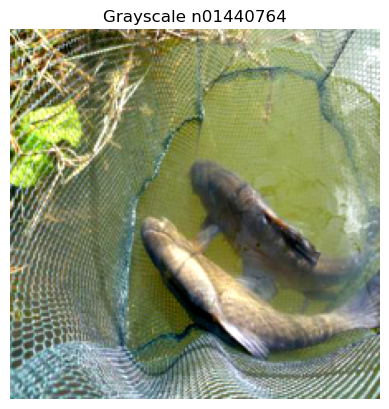

In [12]:
transformation = transforms.Compose([transforms.ColorJitter(contrast=1)])
# DRY = Do Repeat Yourself
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Grayscale {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

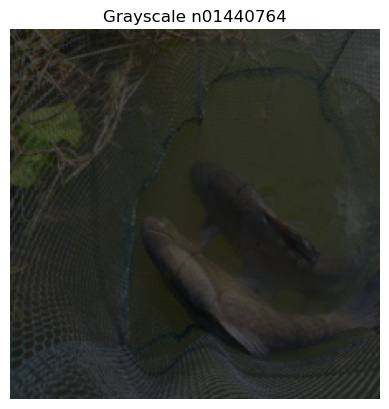

In [13]:
transformation = transforms.Compose([transforms.ColorJitter(brightness=1)])
# DRY = Do Repeat Yourself
image, label = train_dataset[0]
image = transforms.ToPILImage()(image)
image = transformation(image)
image = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
plt.title(f"Grayscale {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

# Tehnike brisanja

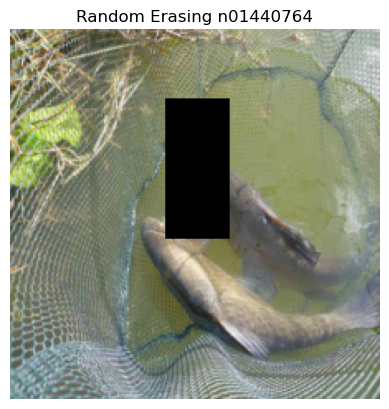

In [14]:
transformation = transforms.Compose([transforms.RandomErasing(1)])
# DRY = Do Repeat Yourself
image, label = train_dataset[0]
image = transformation(image)
image = image.permute(1, 2, 0).numpy()
plt.title(f"Random Erasing {classes[label]}")
plt.imshow(image)
plt.axis('off')
plt.show()

# DCGan preuzet sa https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html i modifikovan dataset

In [15]:
# Root directory for dataset
dataroot = "./imagenet100/train/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 100

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

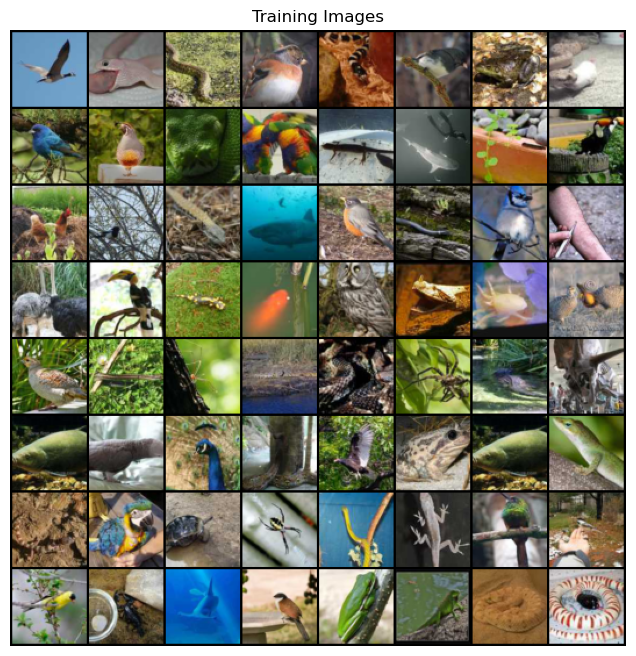

In [16]:
dataset = datasets.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [17]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [18]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [19]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [20]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [21]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [22]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [23]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/100][0/1]	Loss_D: 1.7416	Loss_G: 3.9791	D(x): 0.3590	D(G(z)): 0.3413 / 0.0233
[1/100][0/1]	Loss_D: 1.6567	Loss_G: 6.4064	D(x): 0.9021	D(G(z)): 0.7299 / 0.0026
[2/100][0/1]	Loss_D: 0.5218	Loss_G: 6.8951	D(x): 0.8092	D(G(z)): 0.2285 / 0.0016
[3/100][0/1]	Loss_D: 0.4582	Loss_G: 6.2689	D(x): 0.8108	D(G(z)): 0.1902 / 0.0027
[4/100][0/1]	Loss_D: 0.7207	Loss_G: 7.5079	D(x): 0.8514	D(G(z)): 0.3812 / 0.0008
[5/100][0/1]	Loss_D: 0.6179	Loss_G: 7.8379	D(x): 0.7762	D(G(z)): 0.2664 / 0.0006
[6/100][0/1]	Loss_D: 0.5759	Loss_G: 7.8867	D(x): 0.7704	D(G(z)): 0.2281 / 0.0007
[7/100][0/1]	Loss_D: 0.5366	Loss_G: 9.2425	D(x): 0.8357	D(G(z)): 0.2732 / 0.0001
[8/100][0/1]	Loss_D: 0.3393	Loss_G: 8.1972	D(x): 0.8210	D(G(z)): 0.1168 / 0.0005
[9/100][0/1]	Loss_D: 0.7496	Loss_G: 11.4318	D(x): 0.8944	D(G(z)): 0.4240 / 0.0000
[10/100][0/1]	Loss_D: 0.3588	Loss_G: 8.2492	D(x): 0.7452	D(G(z)): 0.0501 / 0.0004
[11/100][0/1]	Loss_D: 1.0192	Loss_G: 12.4695	D(x): 0.9018	D(G(z)): 0.5269 / 0.000

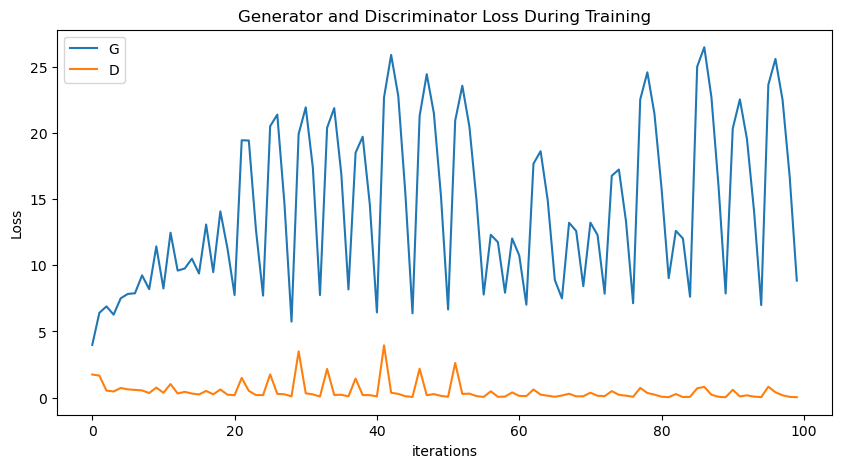

In [24]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

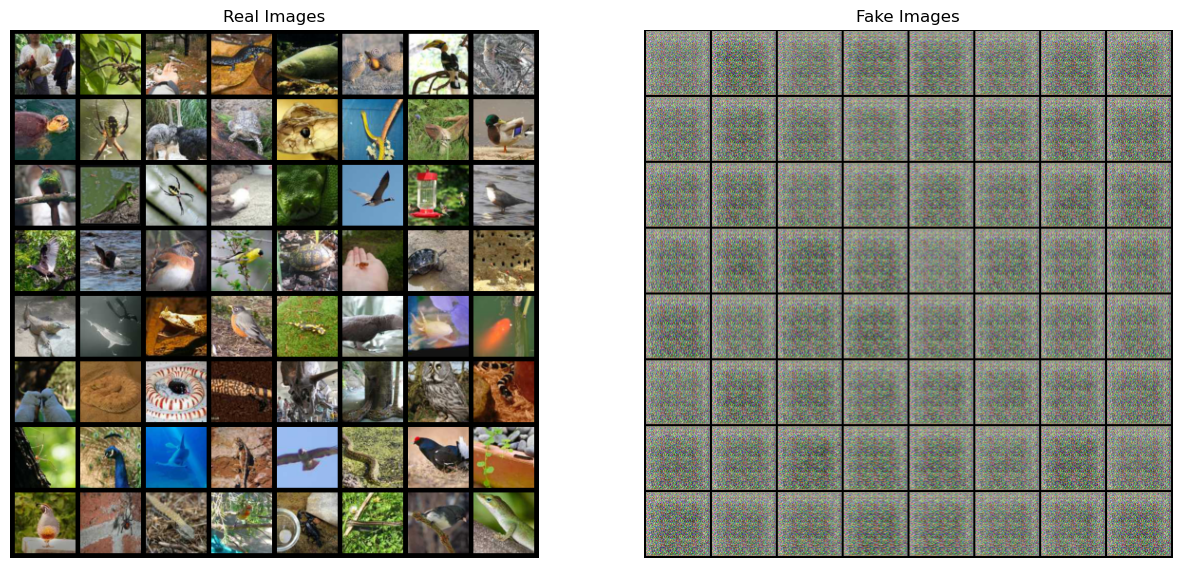

In [25]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()